In [4]:
# Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pylab as py
%matplotlib inline

In [35]:
# Read file into dataframe
df_tweets = pd.read_csv('../05_Feature Selection & Engineering/dataset_tweets_featured.csv', sep=',', encoding='utf-8')
print(df_tweets.shape)
df_tweets.head(5)

(64345, 22)


,interaction_id,tweet_id,senderuser_id,receiveruser_id,tweet_text,cyberbullying_type,interaction_timestamp,harass,cyberstalk,flaming,...,exclusion,impersonation,trolling,hateSpeech,threats,word_count,char_count,avg_word_length,avg_sentence_length,punctuation_count
0,1304,1510,876,2009,@G56YU WHAT IS THAT?,not_cyberbullying,41:34.9,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4,20,2.833333,6.0,2
1,1998,31503,918,2436,@STOCKPUTOUT YES,other_cyberbullying,37:48.7,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2,16,5.000000,3.0,1
2,2533,27942,1409,3624,5/13/15,other_cyberbullying,50:46.1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,7,7.000000,1.0,2
3,2598,52129,1341,3290,@BLACKAMAZON EXACTLY THIS.,none,04:51.4,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3,26,4.800000,5.0,2
4,3511,54626,831,2812,@ODDTANKOUT HTTP://T.CO/K5MMJE8UME,none,11:11.2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2,34,6.600000,5.0,6


Drop the Column 'tweet_text' and 'interaction_timestamp'

In [37]:
df_tweets = df_tweets.drop(columns=['tweet_text', 'interaction_timestamp'])
df_tweets.head(5)

,interaction_id,tweet_id,senderuser_id,receiveruser_id,cyberbullying_type,harass,cyberstalk,flaming,outing,doxing,exclusion,impersonation,trolling,hateSpeech,threats,word_count,char_count,avg_word_length,avg_sentence_length,punctuation_count
0,1304,1510,876,2009,not_cyberbullying,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,20,2.833333,6.0,2
1,1998,31503,918,2436,other_cyberbullying,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,16,5.000000,3.0,1
2,2533,27942,1409,3624,other_cyberbullying,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,7,7.000000,1.0,2
3,2598,52129,1341,3290,none,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,26,4.800000,5.0,2
4,3511,54626,831,2812,none,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,34,6.600000,5.0,6


Second DataFrame without 'interaction_id', 'tweet_id', 'senderuser_id', 'receiveruser_id' and 'cyberbullying_type'

In [38]:
df_tweets_numbers = df_tweets.drop(columns=['interaction_id', 'tweet_id', 'senderuser_id', 'receiveruser_id', 'cyberbullying_type'])
df_tweets_numbers.head(5)

,harass,cyberstalk,flaming,outing,doxing,exclusion,impersonation,trolling,hateSpeech,threats,word_count,char_count,avg_word_length,avg_sentence_length,punctuation_count
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,20,2.833333,6.0,2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,16,5.000000,3.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,7,7.000000,1.0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,26,4.800000,5.0,2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,34,6.600000,5.0,6


# Data Cleaning and Preparation
This step is in the File Folder "04_Data Cleansing".

# Declaration of the data

In [8]:
df_tweets.shape

(64345, 16)

In [9]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64345 entries, 0 to 64344
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cyberbullying_type   64342 non-null  object 
 1   harass               64344 non-null  float64
 2   cyberstalk           64344 non-null  float64
 3   flaming              64344 non-null  float64
 4   outing               64344 non-null  float64
 5   doxing               64344 non-null  float64
 6   exclusion            64344 non-null  float64
 7   impersonation        64344 non-null  float64
 8   trolling             64344 non-null  float64
 9   hateSpeech           64344 non-null  float64
 10  threats              64344 non-null  float64
 11  word_count           64345 non-null  int64  
 12  char_count           64345 non-null  int64  
 13  avg_word_length      64345 non-null  float64
 14  avg_sentence_length  64345 non-null  float64
 15  punctuation_count    64345 non-null 

# Non Graphical Univariate EDA

### Summary statistics of numeric variables

In [39]:
df_tweets_numbers.describe()

,harass,cyberstalk,flaming,outing,doxing,exclusion,impersonation,trolling,hateSpeech,threats,word_count,char_count,avg_word_length,avg_sentence_length,punctuation_count
count,64344.000000,64344.000000,64344.000000,64344.000000,64344.000000,64344.00000,64344.000000,64344.000000,64344.000000,64344.000000,64345.000000,64345.000000,64345.000000,64345.000000,64345.000000
mean,0.051054,0.035512,0.009558,0.008439,0.017360,0.00373,0.009931,0.015604,0.107081,0.024944,21.502463,125.608827,4.059985,15.543540,5.647323
std,0.220109,0.185072,0.097297,0.091476,0.130609,0.06096,0.099159,0.123937,0.309218,0.155956,14.181201,77.696387,0.934399,9.779845,4.517321
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,12.000000,74.000000,3.571429,9.000000,3.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,19.000000,117.000000,3.953488,13.000000,5.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,26.000000,140.000000,4.407407,20.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,790.000000,4962.000000,86.000000,84.000000,303.000000


### Quantiles
As the colums only have the value 0 or 1, the Quantiles are set accordingly.

In [40]:
df_tweets_numbers.quantile(q=[0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95], axis=0, numeric_only=True).round(2)

,harass,cyberstalk,flaming,outing,doxing,exclusion,impersonation,trolling,hateSpeech,threats,word_count,char_count,avg_word_length,avg_sentence_length,punctuation_count
0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,32.0,3.05,5.0,1.0
0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,45.0,3.25,6.0,1.0
0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,74.0,3.57,9.0,3.0
0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,117.0,3.95,13.0,5.0
0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,140.0,4.41,20.0,8.0
0.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,45.0,256.0,4.93,27.5,11.0
0.95,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,49.0,275.0,5.33,32.0,13.0


### Measures of dispersion

In [41]:
df_tweets_numbers.var()

harass                    0.048448
cyberstalk                0.034252
flaming                   0.009467
outing                    0.008368
doxing                    0.017059
exclusion                 0.003716
impersonation             0.009833
trolling                  0.015360
hateSpeech                0.095616
threats                   0.024322
word_count              201.106457
char_count             6036.728587
avg_word_length           0.873102
avg_sentence_length      95.645362
punctuation_count        20.406187
dtype: float64

In [42]:
df_tweets_numbers.std()

harass                  0.220109
cyberstalk              0.185072
flaming                 0.097297
outing                  0.091476
doxing                  0.130609
exclusion               0.060960
impersonation           0.099159
trolling                0.123937
hateSpeech              0.309218
threats                 0.155956
word_count             14.181201
char_count             77.696387
avg_word_length         0.934399
avg_sentence_length     9.779845
punctuation_count       4.517321
dtype: float64

### Skewness

In [43]:
df_tweets_numbers.skew()

harass                  4.079435
cyberstalk              5.019691
flaming                10.081606
outing                 10.747611
doxing                  7.390840
exclusion              16.282386
impersonation           9.884808
trolling                7.817055
hateSpeech              2.541451
threats                 6.092375
word_count              6.155653
char_count              8.250088
avg_word_length        18.678340
avg_sentence_length     1.771209
punctuation_count      10.284862
dtype: float64

The skewness of the values are <0, which means they're right-skewed.

### Kurtosis

In [15]:
df_tweets_numbers.kurtosis()

harass                   14.642246
cyberstalk               23.198015
flaming                  99.641876
outing                  113.514662
doxing                   52.626146
exclusion               263.124283
impersonation            95.712397
trolling                 59.108187
hateSpeech                4.459114
threats                  35.118124
word_count              243.960603
char_count              392.882292
avg_word_length        1239.608209
avg_sentence_length       4.439345
punctuation_count       508.264644
dtype: float64

The kurtosis values are all pretty high, which means they have a high peak.

### Extreme values
Because the fields only have the values 0 or 1, there are no extreme values.

In [16]:
for column in df_tweets.columns:
    # Get unique values in the current column
    unique_values = df_tweets[column].unique()
    
    # Print the column name and its unique values
    print(f"Unique values in '{column}' column:{unique_values}\n")

Unique values in 'cyberbullying_type' column:['not_cyberbullying' 'other_cyberbullying' 'none' 'gender' nan 'sexism'
 'age' 'ethnicity' 'religion' 'racism']

Unique values in 'harass' column:[ 0. nan  1.]

Unique values in 'cyberstalk' column:[ 0. nan  1.]

Unique values in 'flaming' column:[ 0. nan  1.]

Unique values in 'outing' column:[ 0. nan  1.]

Unique values in 'doxing' column:[ 0. nan  1.]

Unique values in 'exclusion' column:[ 0. nan  1.]

Unique values in 'impersonation' column:[ 0. nan  1.]

Unique values in 'trolling' column:[ 0. nan  1.]

Unique values in 'hateSpeech' column:[ 0. nan  1.]

Unique values in 'threats' column:[ 0. nan  1.]

Unique values in 'word_count' column:[  4   2   1   3   7   5   6   8   9  11  10  15  14  23  21  51  26  19
  17  18  34  32  22  47  20  52  24  27  25  49  30  53  40  12  16  29
  28  39  48  50  45  42  31  43  55  37  13  41  46  44  35  38  57  33
  36  54  56  58  60  59 505  63  62 237  61 790  64 276  96  65 125 181
 289 692 13

# Non Graphical Multivariate EDA

### Cross-tabulation

In [17]:
pd.crosstab(df_tweets['harass'], df_tweets['cyberbullying_type'])

cyberbullying_type,age,ethnicity,gender,none,not_cyberbullying,other_cyberbullying,racism,religion,sexism
harass,,,,,,,,,
0.0,7289,7810,7445,11186,7100,7384,1908,7609,3326
1.0,671,132,501,272,823,413,57,373,43


### Pivot Tables

In [18]:
pd.pivot_table(df_tweets[['cyberbullying_type', 'harass', 'cyberstalk', 'flaming', 'outing', 'doxing', 'exclusion', 'impersonation', 'trolling', 'hateSpeech', 'threats', 'word_count', 'char_count', 'avg_word_length', 'avg_sentence_length', 'punctuation_count']],
               index=['cyberbullying_type'],
               values=['harass', 'cyberstalk', 'flaming', 'outing', 'doxing', 'exclusion', 'impersonation', 'trolling', 'hateSpeech', 'threats', 'word_count', 'char_count', 'avg_word_length', 'avg_sentence_length', 'punctuation_count'],
               aggfunc=np.mean)

/var/folders/y8/blsng9yn0_jdwkc6k9fx0f240000gn/T/ipykernel_24966/2468566871.py:1: FutureWarning: The provided callable <function mean at 0x1047c8400> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.pivot_table(df_tweets[['cyberbullying_type', 'harass', 'cyberstalk', 'flaming', 'outing', 'doxing', 'exclusion', 'impersonation', 'trolling', 'hateSpeech', 'threats', 'word_count', 'char_count', 'avg_word_length', 'avg_sentence_length', 'punctuation_count']],


,avg_sentence_length,avg_word_length,char_count,cyberstalk,doxing,exclusion,flaming,harass,hateSpeech,impersonation,outing,punctuation_count,threats,trolling,word_count
cyberbullying_type,,,,,,,,,,,,,,,
age,20.789449,3.915273,173.417211,0.040578,0.016960,0.008920,0.008040,0.084296,0.062060,0.013693,0.012312,4.335930,0.029523,0.012563,32.339447
ethnicity,17.548266,3.868816,139.373583,0.032234,0.011584,0.002770,0.012339,0.016620,0.124780,0.007681,0.005162,5.929363,0.011710,0.009821,24.900655
gender,17.398787,3.996650,136.404984,0.035238,0.014221,0.004027,0.027183,0.063051,0.257110,0.011075,0.005286,6.408382,0.036622,0.026932,23.538384
none,12.352011,4.080292,89.287136,0.028626,0.018677,0.002007,0.004451,0.023739,0.039448,0.004015,0.008815,5.527841,0.020859,0.017542,14.351545
not_cyberbullying,11.971870,4.091466,83.126467,0.030039,0.013126,0.002019,0.003029,0.103875,0.029156,0.002398,0.006311,4.987252,0.013631,0.012495,13.649628
other_cyberbullying,11.579997,4.105765,85.733231,0.030653,0.021547,0.001539,0.003976,0.052969,0.039118,0.004104,0.010645,5.319097,0.012825,0.021932,14.107349
racism,15.810068,4.555030,121.397455,0.052417,0.020356,0.002545,0.007634,0.029008,0.115522,0.019847,0.007125,5.998473,0.053944,0.009669,18.164885
religion,18.883526,4.266433,197.974944,0.051366,0.027437,0.006264,0.011902,0.046730,0.101102,0.027186,0.013029,6.793285,0.049486,0.009396,33.415811
sexism,14.415616,3.977055,101.558326,0.032057,0.009498,0.002671,0.006233,0.012763,0.397744,0.008311,0.002968,6.088454,0.011279,0.013951,16.725141


### Correlation Matrix

In [19]:
df_tweets_numbers.corr()

,harass,cyberstalk,flaming,outing,doxing,exclusion,impersonation,trolling,hateSpeech,threats,word_count,char_count,avg_word_length,avg_sentence_length,punctuation_count
harass,1.000000,0.012339,0.053413,0.004074,0.021069,0.013607,0.006677,0.047140,-0.007024,0.139927,0.108392,0.120001,0.036370,0.053817,0.061042
cyberstalk,0.012339,1.000000,-0.001588,0.007084,0.003429,0.015810,0.012964,0.006332,0.017740,0.009155,0.071156,0.081664,0.018851,0.050707,0.047491
flaming,0.053413,-0.001588,1.000000,-0.003824,0.001619,0.001850,0.007881,0.227355,0.083243,0.010918,0.081098,0.083725,-0.000152,0.041180,0.034436
outing,0.004074,0.007084,-0.003824,1.000000,0.493756,0.013865,0.009608,0.002094,-0.010519,0.010301,0.048773,0.054588,0.010702,0.020928,0.020252
doxing,0.021069,0.003429,0.001619,0.493756,1.000000,-0.000325,0.052690,0.000548,-0.008701,0.010787,0.071445,0.080119,0.019184,0.036370,0.033898
exclusion,0.013607,0.015810,0.001850,0.013865,-0.000325,1.000000,0.004156,0.004639,0.004370,0.014735,0.064997,0.070929,0.007198,0.030486,0.031471
impersonation,0.006677,0.012964,0.007881,0.009608,0.052690,0.004156,1.000000,0.002566,0.001812,0.004081,0.072512,0.074081,0.001387,0.042204,0.018781
trolling,0.047140,0.006332,0.227355,0.002094,0.000548,0.004639,0.002566,1.000000,0.054136,0.009614,0.050857,0.058860,0.016968,0.035713,0.035255
hateSpeech,-0.007024,0.017740,0.083243,-0.010519,-0.008701,0.004370,0.001812,0.054136,1.000000,0.010034,0.123017,0.125495,-0.017947,0.092881,0.067708
threats,0.139927,0.009155,0.010918,0.010301,0.010787,0.014735,0.004081,0.009614,0.010034,1.000000,0.094988,0.111419,0.040059,0.052091,0.049237


### Covariance Matrix

In [20]:
df_tweets_numbers.cov()

,harass,cyberstalk,flaming,outing,doxing,exclusion,impersonation,trolling,hateSpeech,threats,word_count,char_count,avg_word_length,avg_sentence_length,punctuation_count
harass,0.048448,0.000503,0.001144,0.000082,0.000606,0.000183,0.000146,0.001286,-0.000478,0.004803,0.338333,2.052201,0.007479,0.115848,0.060694
cyberstalk,0.000503,0.034252,-0.000029,0.000120,0.000083,0.000178,0.000238,0.000145,0.001015,0.000264,0.186751,1.174261,0.003259,0.091777,0.039704
flaming,0.001144,-0.000029,0.009467,-0.000034,0.000021,0.000011,0.000076,0.002742,0.002504,0.000166,0.111897,0.632927,-0.000014,0.039184,0.015135
outing,0.000082,0.000120,-0.000034,0.008368,0.005899,0.000077,0.000087,0.000024,-0.000298,0.000147,0.063270,0.387973,0.000915,0.018722,0.008369
doxing,0.000606,0.000083,0.000021,0.005899,0.017059,-0.000003,0.000682,0.000009,-0.000351,0.000220,0.132328,0.813030,0.002341,0.046456,0.020000
exclusion,0.000183,0.000178,0.000011,0.000077,-0.000003,0.003716,0.000025,0.000035,0.000082,0.000140,0.056188,0.335941,0.000410,0.018175,0.008666
impersonation,0.000146,0.000238,0.000076,0.000087,0.000682,0.000025,0.009833,0.000032,0.000056,0.000063,0.101965,0.570734,0.000128,0.040927,0.008413
trolling,0.001286,0.000145,0.002742,0.000024,0.000009,0.000035,0.000032,0.015360,0.002075,0.000186,0.089384,0.566788,0.001965,0.043286,0.019738
hateSpeech,-0.000478,0.001015,0.002504,-0.000298,-0.000351,0.000082,0.000056,0.002075,0.095616,0.000484,0.539434,3.014999,-0.005185,0.280880,0.094577
threats,0.004803,0.000264,0.000166,0.000147,0.000220,0.000140,0.000063,0.000186,0.000484,0.024322,0.210078,1.350073,0.005837,0.079450,0.034688


# Graphical Univariate EDA
Most Graphics like Line, Histograms, Density Plots, QQ-Plots or Barcharts don't make sense for the Features, that have the values 0 or 1.

### Density Plot (seaborn)

/var/folders/y8/blsng9yn0_jdwkc6k9fx0f240000gn/T/ipykernel_24966/2867621485.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_tweets['word_count'],
/Users/salomekoller/anaconda3/envs/pga/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/salomekoller/anaconda3/envs/pga/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN bef

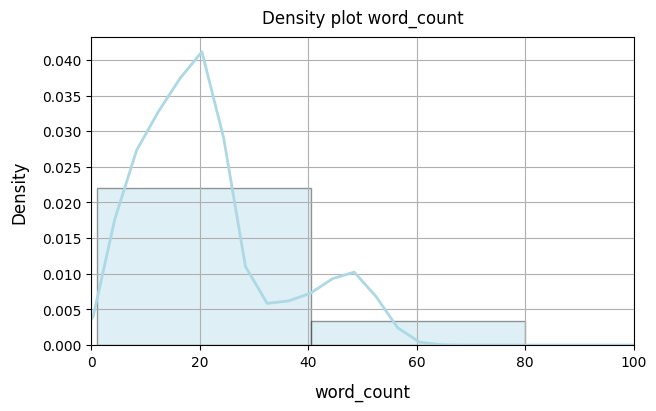

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 4))
sns.distplot(df_tweets['word_count'], 
             hist=True, 
             kde=True, 
             bins=20, 
             color='lightblue',
             hist_kws={'edgecolor': 'black'},
             kde_kws={'linewidth': 2},
            )

plt.title('Density plot word_count', fontsize=12, pad=10)
plt.xlabel('word_count', fontsize=12, labelpad=10)
plt.ylabel('Density', fontsize=12, labelpad=10)

# Limit x-axis to 100
plt.xlim(0, 100)

plt.grid(True)
plt.show()


### Boxplot (seaborn)
For the Features word_count, char_count, avg_word_length, avg_sentence_length and punctuation_count

/Users/salomekoller/anaconda3/envs/pga/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/salomekoller/anaconda3/envs/pga/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/salomekoller/anaconda3/envs/pga/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='punctuation_count'>

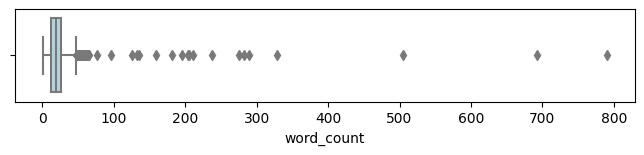

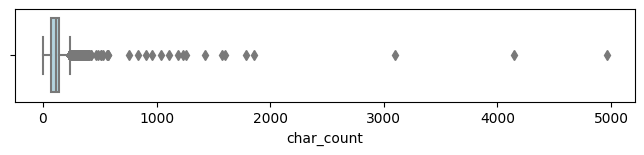

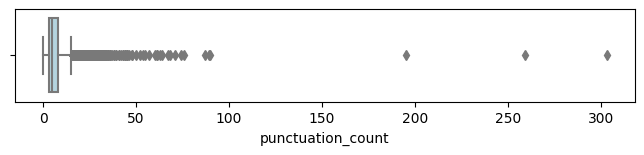

In [22]:
plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df_tweets['word_count'], color="lightblue")

plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df_tweets['char_count'], color="lightblue")

plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df_tweets['punctuation_count'], color="lightblue")

Average Features

/Users/salomekoller/anaconda3/envs/pga/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/salomekoller/anaconda3/envs/pga/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='avg_sentence_length'>

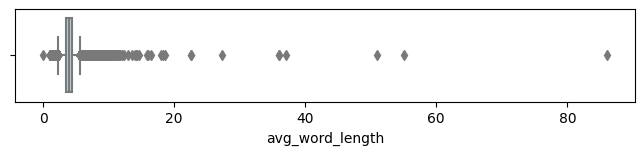

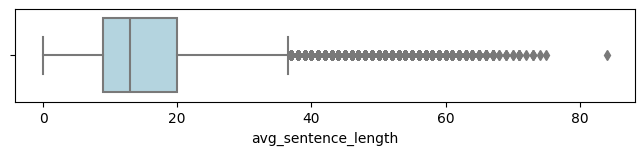

In [23]:
plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df_tweets['avg_word_length'], color="lightblue")

plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df_tweets['avg_sentence_length'], color="lightblue")

### Quantile-Quantile (QQ-) plot

       word_count        var
41674           1  -1.445749
44626           1  -1.445749
4378            1  -1.445749
44677           1  -1.445749
28241           1  -1.445749
...           ...        ...
27354         289  18.862827
49004         329  21.683463
2709          505  34.094259
33936         692  47.280731
12521         790  54.191288

[64345 rows x 2 columns]


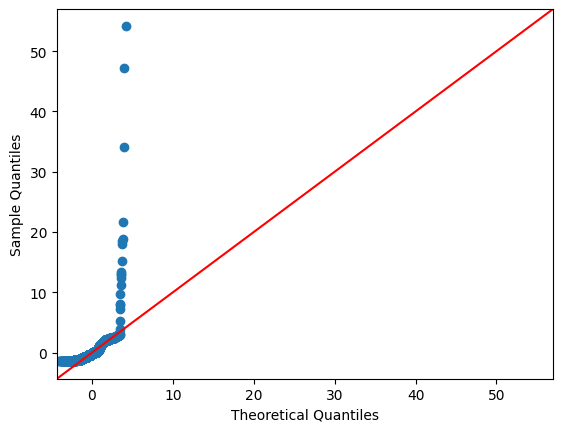

In [24]:
# Variable (standardized)
x = 'word_count'
df_qq = df_tweets
df_qq['var'] = (df_tweets[x]-df_tweets[x].mean()) / df_tweets[x].std()
print(df_qq.sort_values('var')[['word_count', 'var']])
    
# Plot
sm.qqplot(df_qq['var'], line ='45')
py.show()

### Piechart (matplotlib)

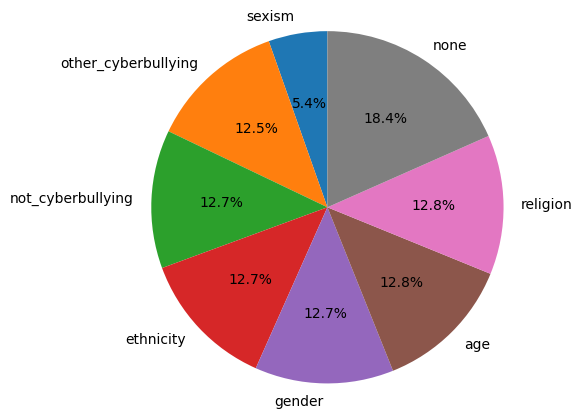

In [25]:
# Group data by rooms (only the 8 most frequently occurencies by rooms)
df_bar = df_tweets.cyberbullying_type.value_counts().nlargest(8).sort_values(ascending=True)

# Simple bar chart
sizes = list(df_bar.values)
labels = list(df_bar.index.values)

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, 
        labels=labels, 
        autopct='%1.1f%%',
        shadow=False, 
        startangle=90)
ax1.axis('equal')  # ensures that pie is drawn as a circle.

plt.show()

#### Users: How many Users sent messages

/Users/salomekoller/anaconda3/envs/pga/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/salomekoller/anaconda3/envs/pga/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


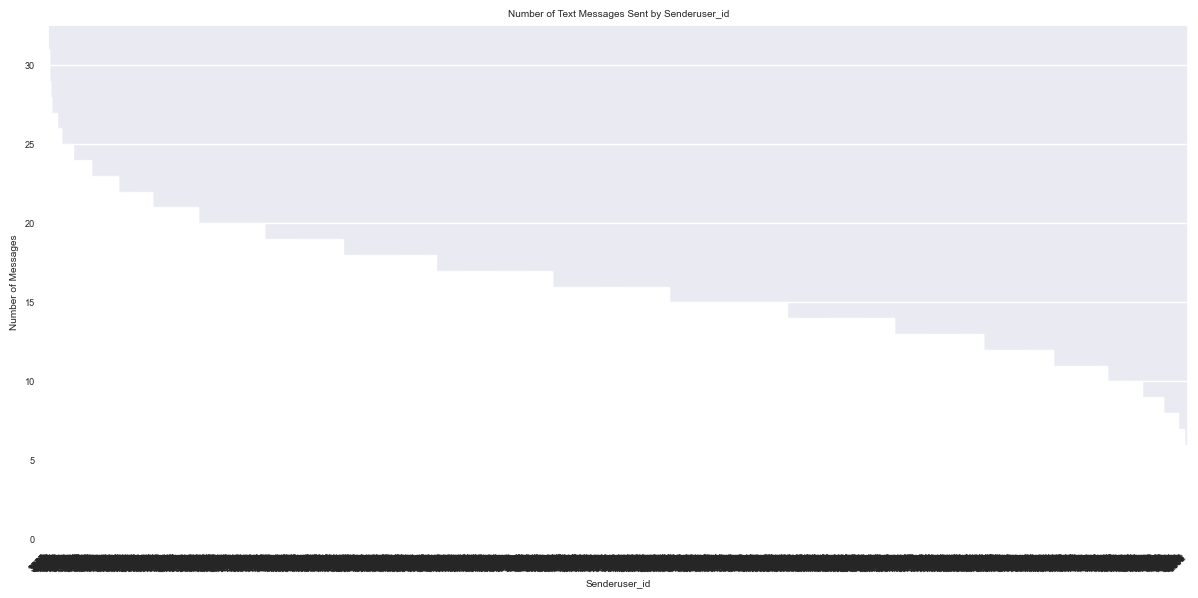

In [46]:
# Count the number of text messages per senderuser_id
message_counts = df_messages['senderuser_id'].value_counts()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=message_counts.index, y=message_counts.values, palette="viridis", order=message_counts.index)
plt.title('Number of Text Messages Sent by Senderuser_id')
plt.xlabel('Senderuser_id')
plt.ylabel('Number of Messages')
plt.xticks(rotation=45, ha='right')
plt.tight_layout() 
plt.show()

It is visible, that a lot of people send a lot of messages and lesser people write few messages.

# Graphical Multivariate EDA
Most Graphics like Scatterplots, Regressionlines, Matrices, Hexagonal binning plots or Correlation heatmaps don't make sense for the 0 or 1 features.

Also for the other features a comparation of the different Features don't give a value. For Example, the below scatterplot shows the correlation of word count and char count. But we can't really draw a further information out of it.

### Scatterplot

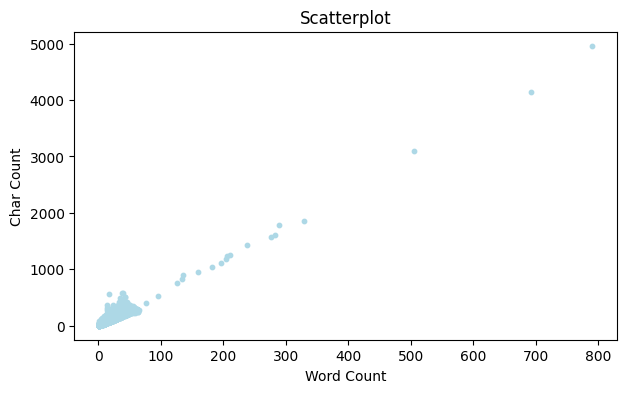

In [26]:
plt.figure(figsize=(7,4))
plt.scatter(df_tweets['word_count'], 
           df_tweets['char_count'], 
           color="lightblue", 
           alpha=1.0,
           s=10)
plt.title('Scatterplot', fontsize=12)
plt.xlabel('Word Count')
plt.ylabel('Char Count')
plt.show()

### Scatterplot-matrix (seaborn)

/Users/salomekoller/anaconda3/envs/pga/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/salomekoller/anaconda3/envs/pga/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/salomekoller/anaconda3/envs/pga/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/salomekoller/anaconda3/envs/pga/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be r

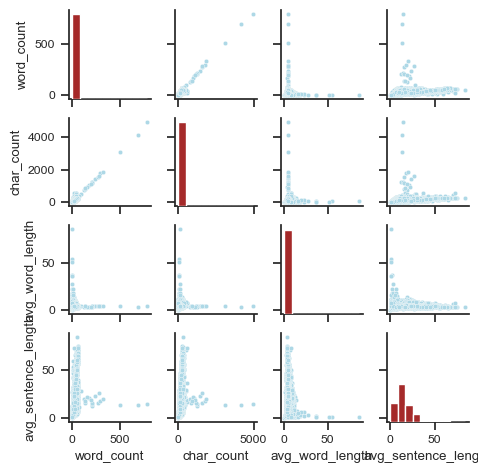

In [27]:
sns.set(style="ticks", font_scale=0.8)
g = sns.PairGrid(df_tweets[['word_count', 
                     'char_count', 
                     'avg_word_length', 
                     'avg_sentence_length']], 
                 height=1.2, 
                 aspect=1)
g.map_upper(sns.scatterplot,color='lightblue', s=10)
g.map_lower(sns.scatterplot, color='lightblue', s=10)
g.map_diag(plt.hist, color='brown')

### Correlation heatmap:

<Axes: >

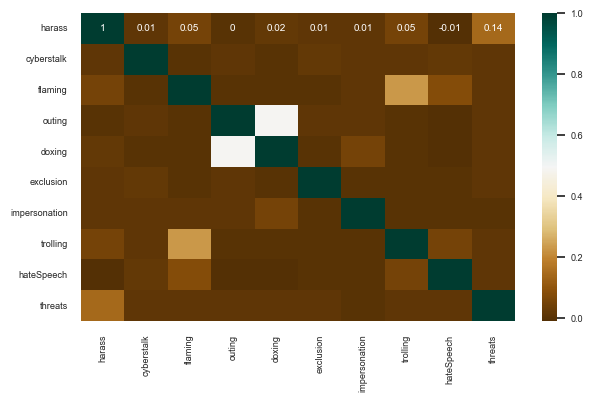

In [28]:
# Set font size for plot
sns.set(font_scale=0.6)

# Create correlation matrix as the basis for the heatmap
plt.figure(figsize=(7,4))
corr = df_tweets[['harass', 'cyberstalk', 'flaming', 'outing', 'doxing', 'exclusion', 'impersonation', 'trolling', 'hateSpeech', 'threats']].corr().round(2)

# Plot heatmap
sns.heatmap(corr, 
            cmap="BrBG", 
            annot=True)